In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [9]:
prefix = './coffea/skimmed/'

suffix = 'ABCD_SR_goodvtx_v11_0p98'

In [10]:
# Signal
sig_histo = util.load(f'{prefix}/signal_{suffix}.coffea')[0]

In [11]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

## Signal

In [12]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [13]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections',
 '0 < NJet < 3',
 'n(good vertex) > 0',
 'Leading jet pT > 80 GeV',
 'Leading jet |eta| < 2.4',
 'dPhi(MET,leading jet) > 2.0',
 'dPhi(MET,all jets) > 0.75',
 'OSSF',
 'theta < 1.22 rad',
 'BDT']

In [14]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [15]:
table = eff_cutflow
table.columns = cutnames

In [16]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Efficiency.csv


In [17]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [18]:
table = cts_cutflow
table.columns = cutnames

In [19]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,0 < NJet < 3,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 1.22 rad,BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.1691,41.8661,27.9179,27.8883,26.9500,26.9500,26.3573,25.6881,21.4339,4.1561
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,156.9315","1,103.4899",669.5108,668.8761,645.5507,645.5507,636.2743,618.6689,546.8828,110.5973
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,457.7156","1,391.1330",830.3569,829.1736,800.3249,800.3249,788.9754,768.1660,689.8959,136.0692
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,74.7132,70.8140,46.3646,46.3334,44.6114,44.6052,43.7006,42.5716,37.2008,8.3653
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,964.2733","1,881.3989","1,104.5540","1,103.8347","1,066.5369","1,066.5369","1,051.7553","1,018.6149",934.2904,196.5970
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,725.2304","2,577.6066","1,481.2791","1,480.9808","1,427.5907","1,427.5907","1,407.9124","1,361.9673","1,261.7544",283.3007
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,620.1785","1,553.0300",717.0621,716.4304,689.8361,689.8361,680.3314,656.2454,629.6533,156.4219
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,765.0692","32,297.8427","11,703.4580","11,703.4580","11,190.8174","11,190.8174","10,996.1250","10,359.8293","9,688.3497","1,661.8314"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,167.4818,159.4783,107.5397,107.5397,103.4024,103.4024,102.3719,99.0149,92.2910,20.1486
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,184.6540","3,993.3822","2,246.8969","2,243.0870","2,169.8070","2,169.8070","2,131.2702","2,067.5270","1,940.9615",453.4090


In [20]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_EventCount_Weighted.csv


In [21]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [22]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [23]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Raw.csv


['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m5to40.png


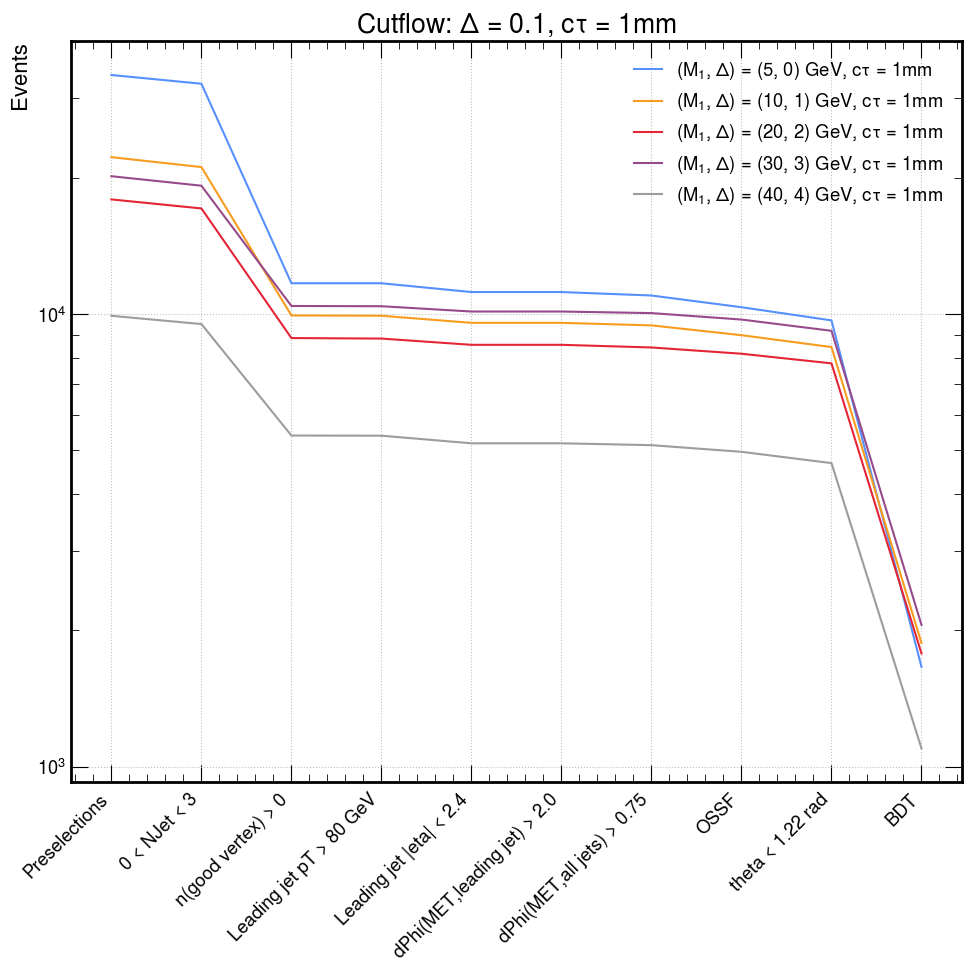

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m5to40.png


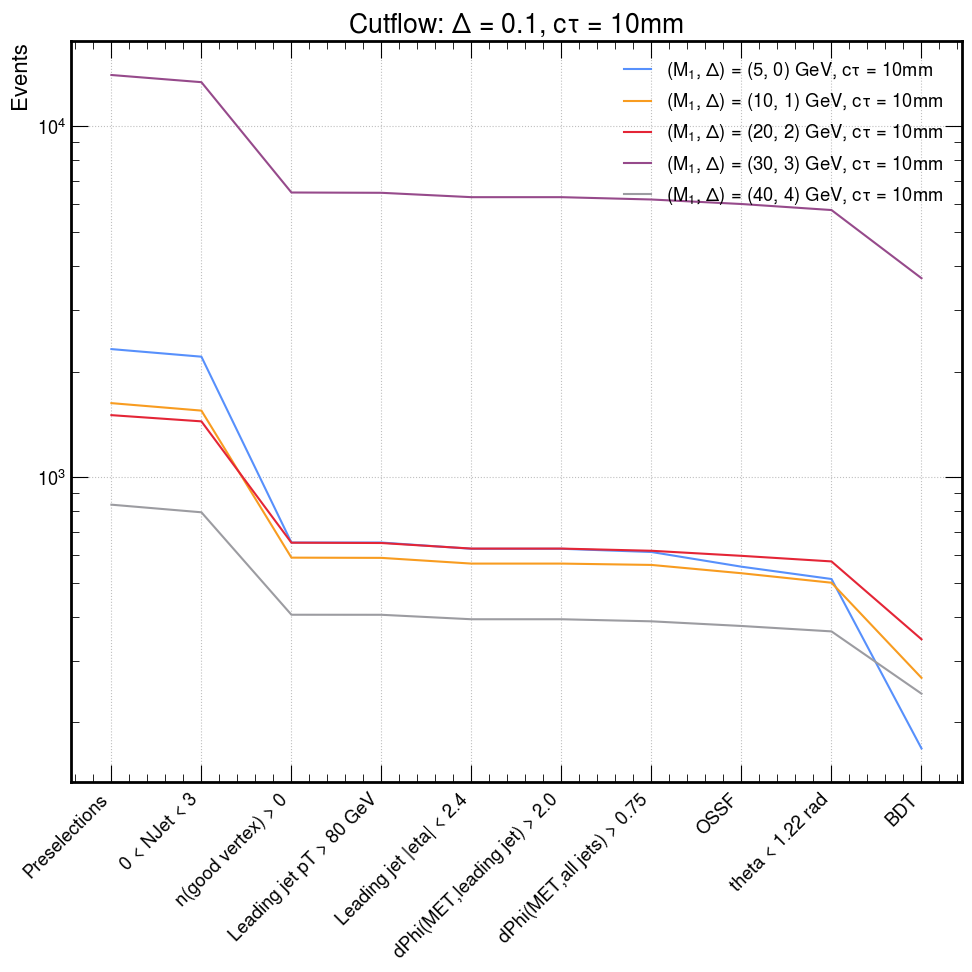

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m5to40.png


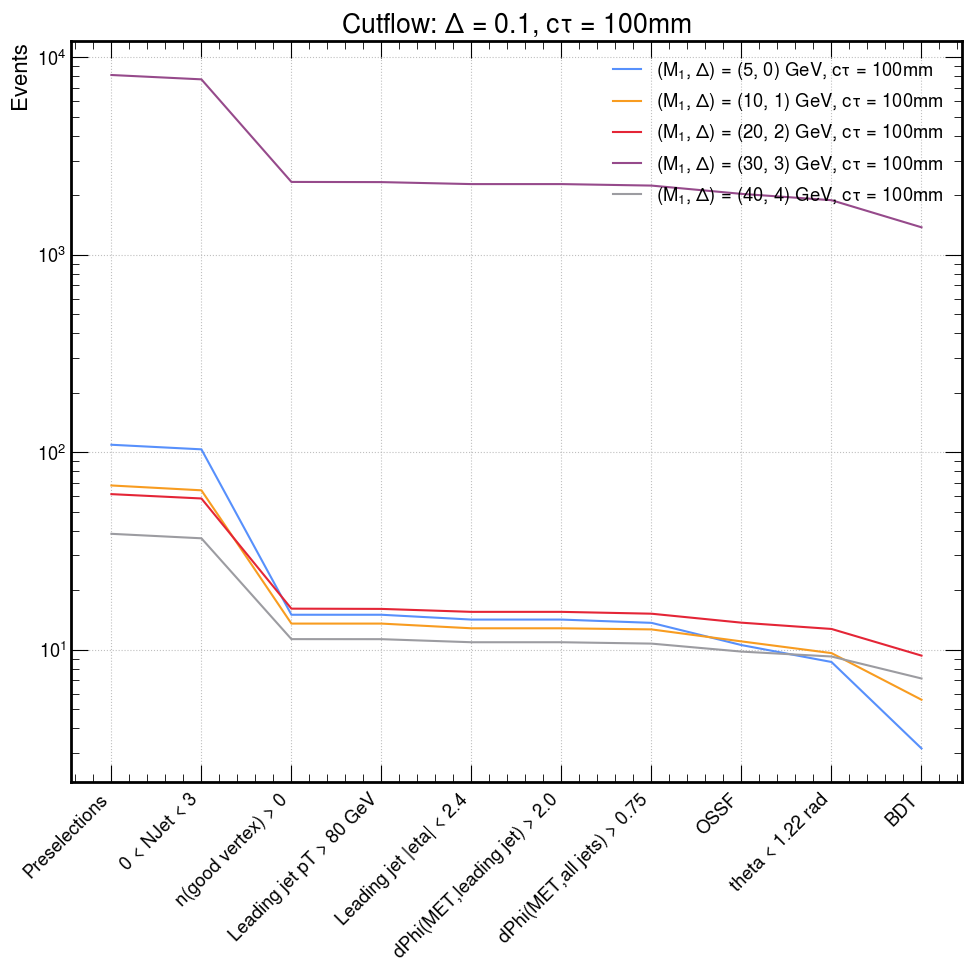

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m5to40.png


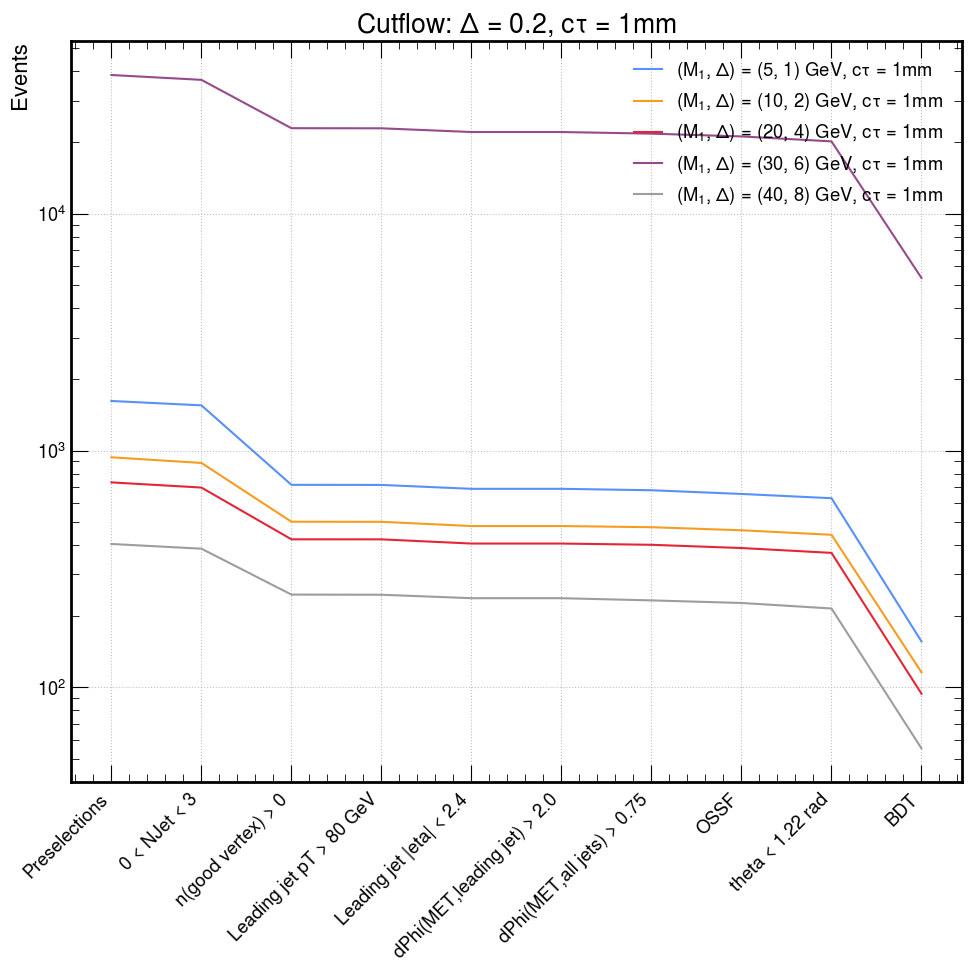

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m5to40.png


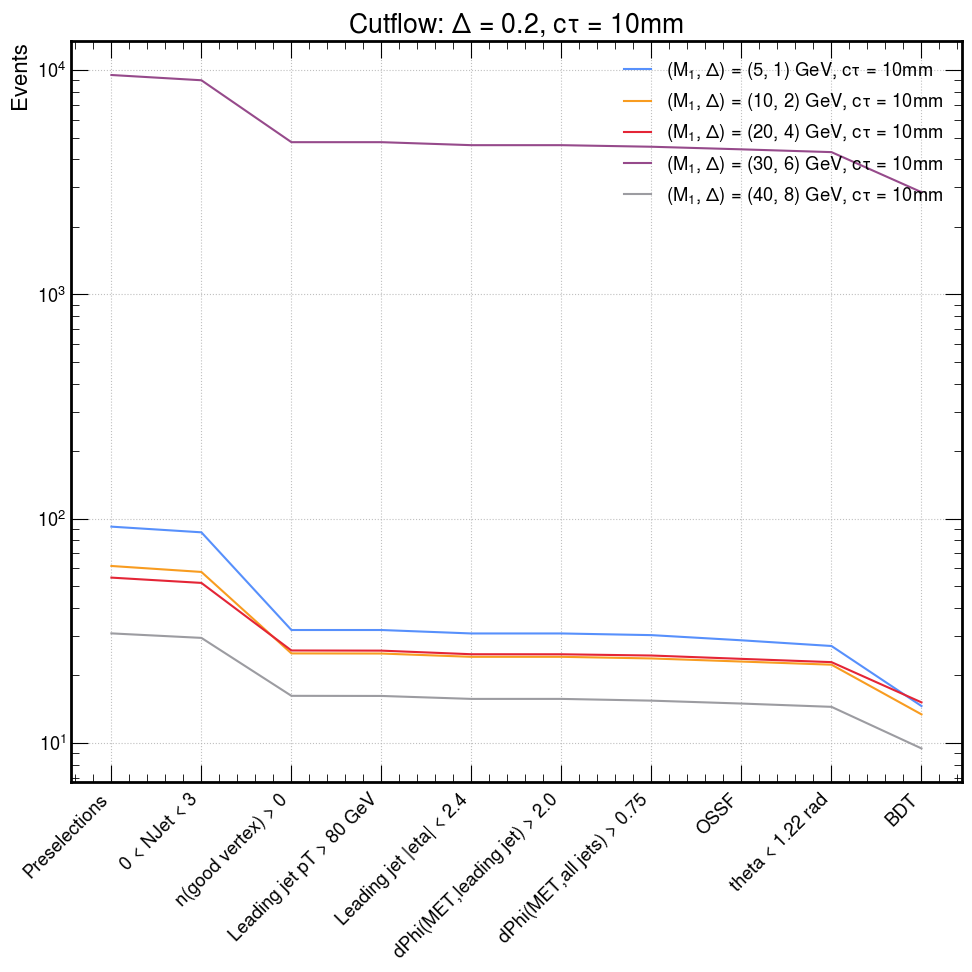

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m5to40.png


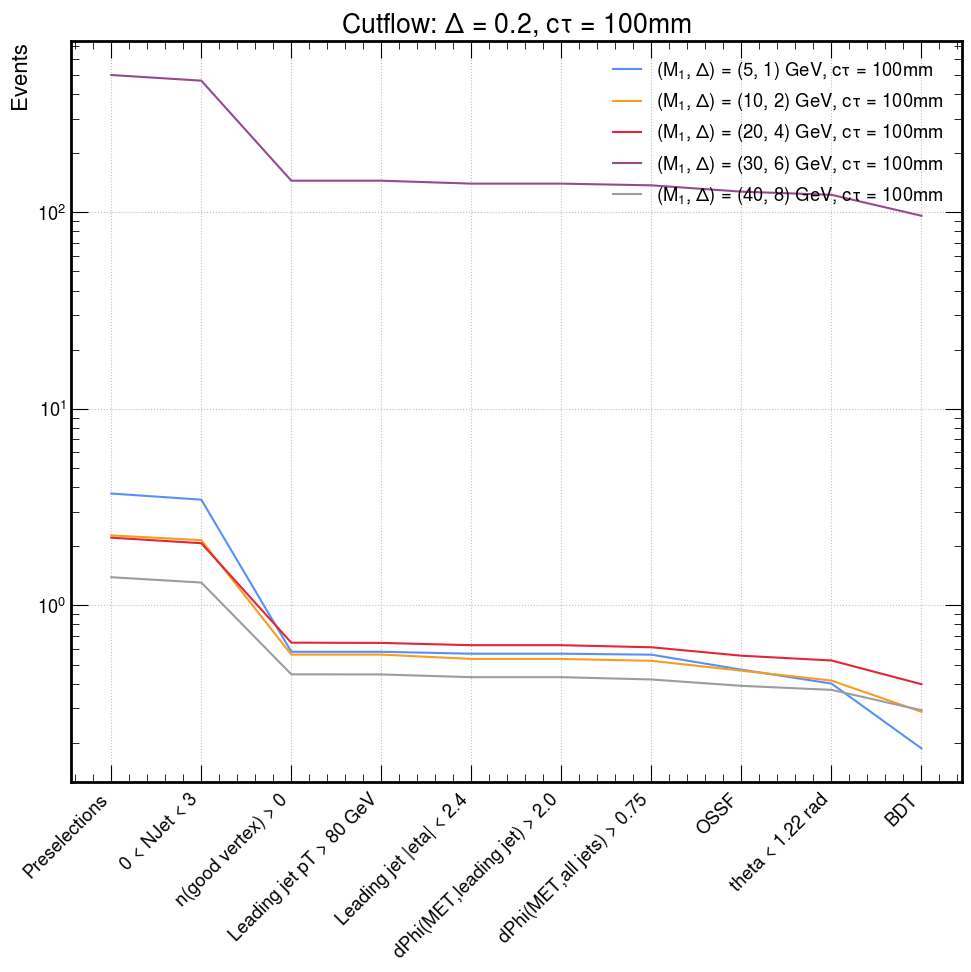

In [24]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

In [57]:
cuts = utils.get_signal_list_of_cuts(sig_histo)

#cuts[1] = 'n(good vertex) > 0 && 0 < N(Jets) < 3'
#cuts[2] = 'b-jet veto loose WP'
cuts[2] = r"Leading jet $p_{T} > 80$ GeV"
cuts[3] = r"Leading jet $|\eta| < 2.4$"
cuts[4] = r"$|\Delta\phi(p_{T}^{miss},$leading jet)$| > 2.0$"
cuts[5] = r"min$|\Delta\phi(p_{T}^{miss},$all jets)$| < 0.75$"
cuts[6] = r"SV(ee) OS"
cuts[7] = r"$\theta_{coll} < 1.22$"
cuts[8] = 'BDT score > 0.96'

print(cuts)

['Preselections', '0 < NJet < 3', 'Leading jet $p_{T} > 80$ GeV', 'Leading jet $|\\eta| < 2.4$', '$|\\Delta\\phi(p_{T}^{miss},$leading jet)$| > 2.0$', 'min$|\\Delta\\phi(p_{T}^{miss},$all jets)$| < 0.75$', 'SV(ee) OS', '$\\theta_{coll} < 1.22$', 'BDT score > 0.96', 'BDT']


In [59]:
table = cts_cutflow
table.columns = cuts

In [60]:
sig_cdict = {
    '5': "#3f90da", 
    '10': "#ffa90e", 
    '20': "#bd1f01", 
    '30': "#94a4a2", 
    '40': "#832db6", 
    '50': "#a96b59", 
    '60': "#e76300", 
    '70': "#b9ac70", 
    '80': "#717581", 
    '90': "#92dadd",
    '100': "#2ca02c"

}

In [61]:
import mplhep as hep
hep.style.use("CMS")

plt.rcParams["figure.figsize"] = (18,13)

In [ ]:
hep.cms.label('', data=False, llabel='Private Work', rlabel='')

ct = 1
delt = 0.2

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

m1_list = []
for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    m1_list.append(m1)

df['m1'] = m1_list
df = df.sort_values(by=['m1']) # sort by m1
df.pop('m1')

plt.plot(cuts, bkg_cts_df.loc['Total'], label='Bkg', color='black', linewidth=2)

m1s = [10, 20, 50, 90]

for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    delta = sig_dict['delta']
    dmchi = sig_dict['dmchi']
    ctau = int(sig_dict['ctau'])

    if (ctau == ct) and (delta == delt) and (m1 in m1s):
        #print(ctau, delta)
        plt.plot(cuts, df.loc[point], label=rf"$M_{1} = {m1:.0f}$ GeV", color=sig_cdict[str(m1)])


plt.grid()
    
plt.ylabel("Events")
plt.title(rf"c$\tau$ = {ct} mm, {int(delt*100)}% Splitting")
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')

plt.yscale('log')
plt.legend(loc='upper right', ncols=1)


plt.savefig(f'cutflow_SR_ct{ct}_delta{str(delt).replace(".","p")}.png', bbox_inches = "tight")

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m50to100.png


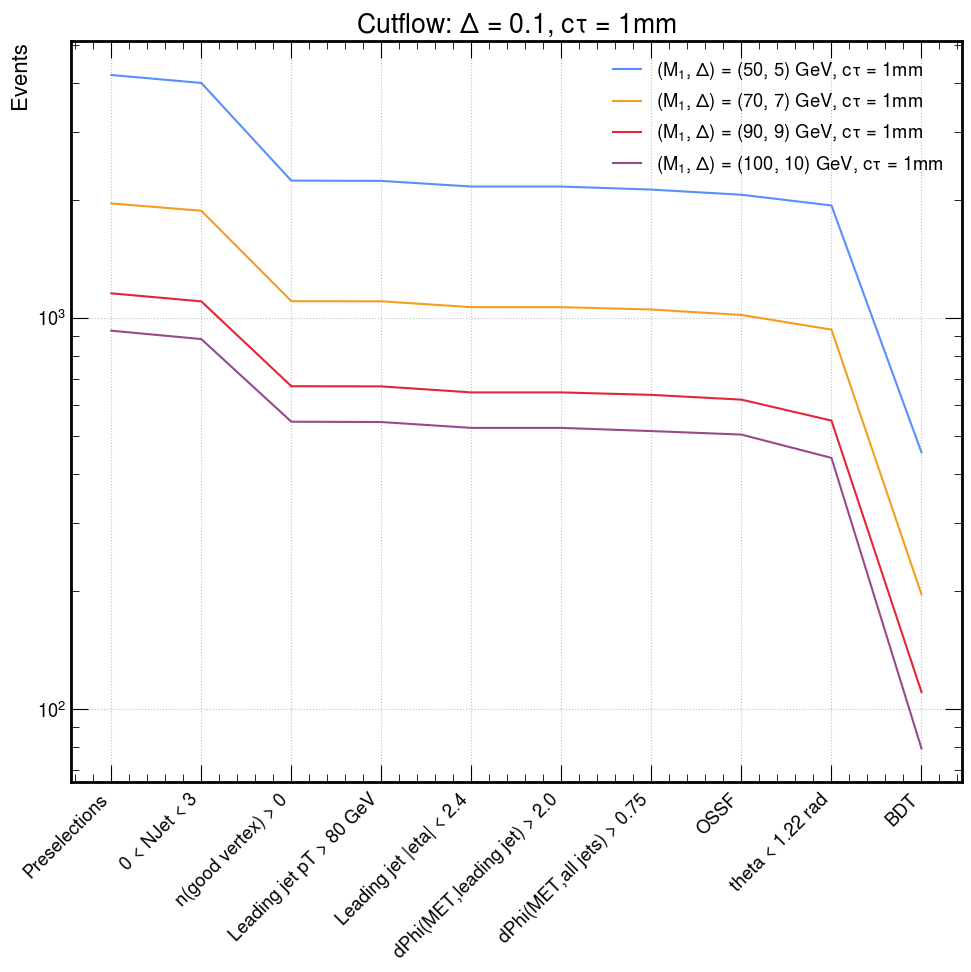

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m50to100.png


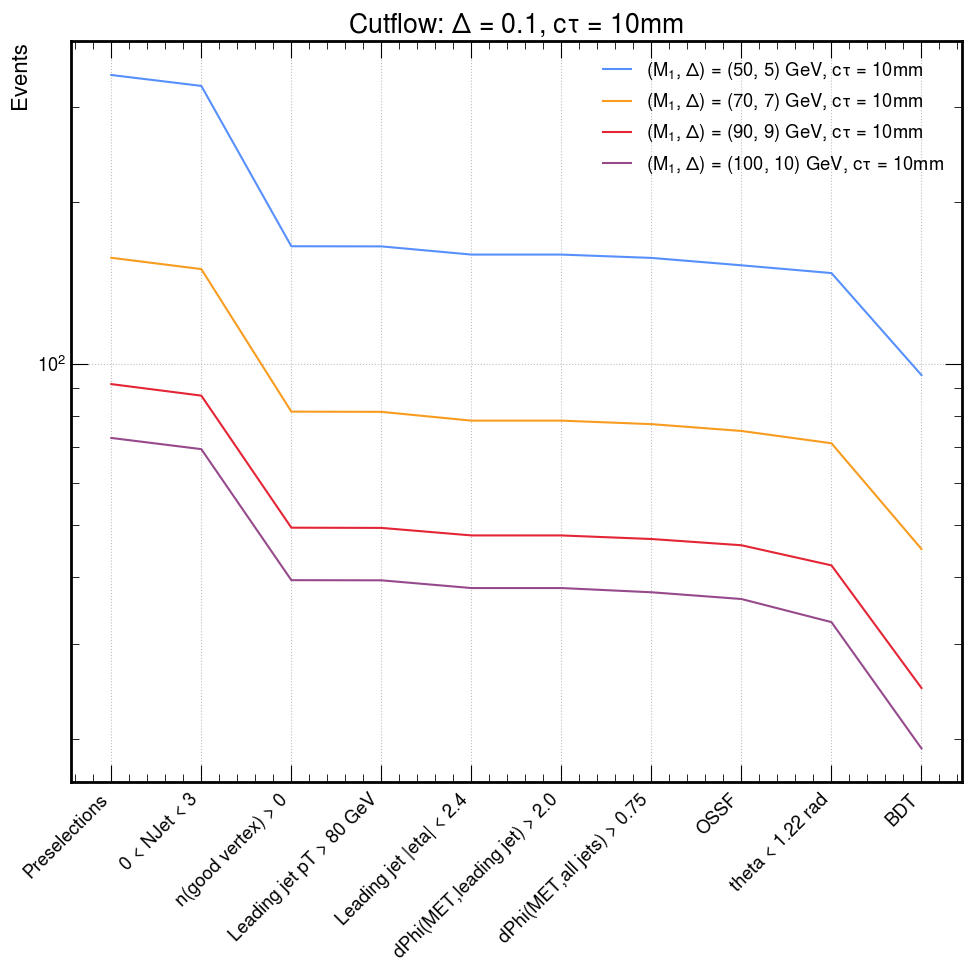

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m50to100.png


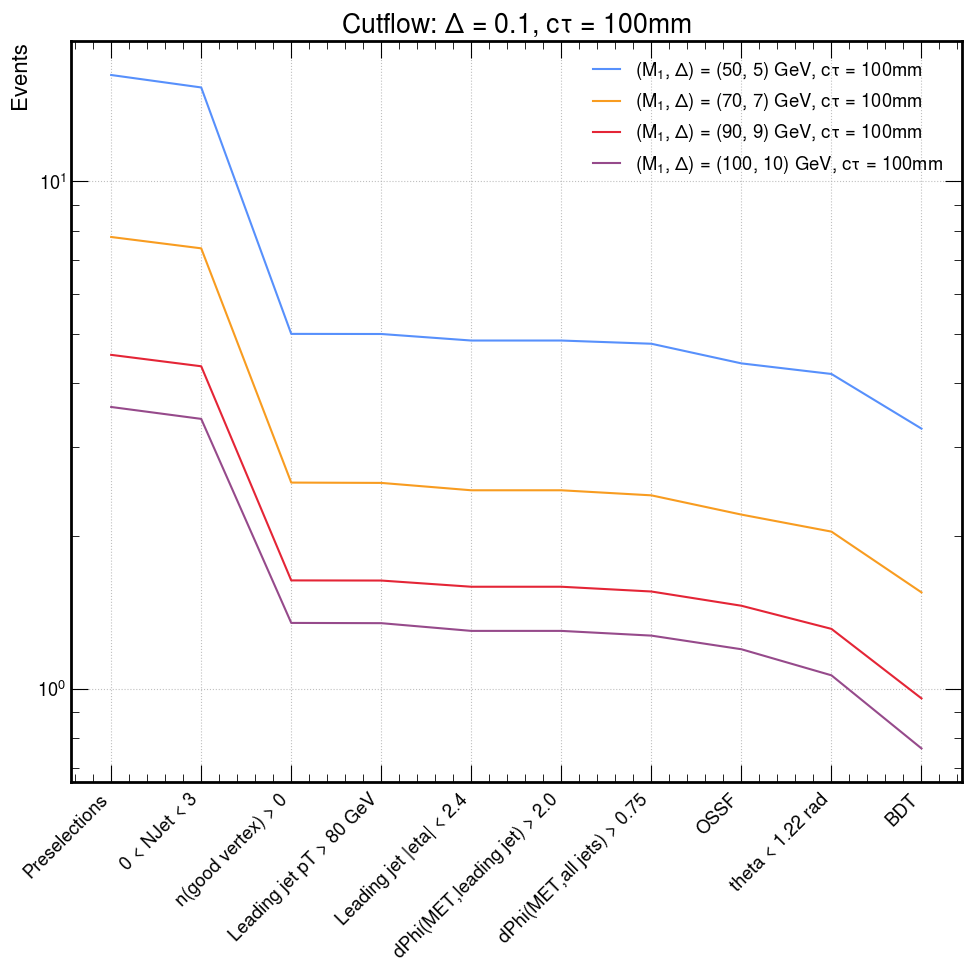

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m50to100.png


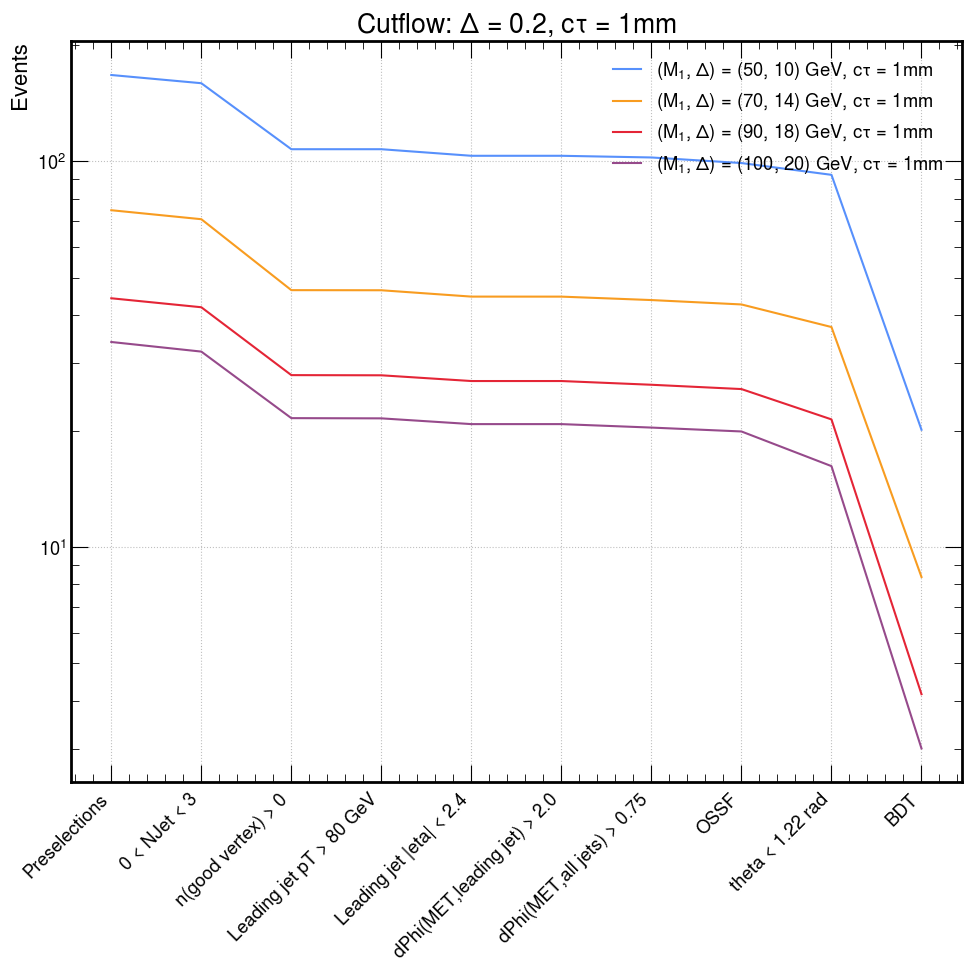

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m50to100.png


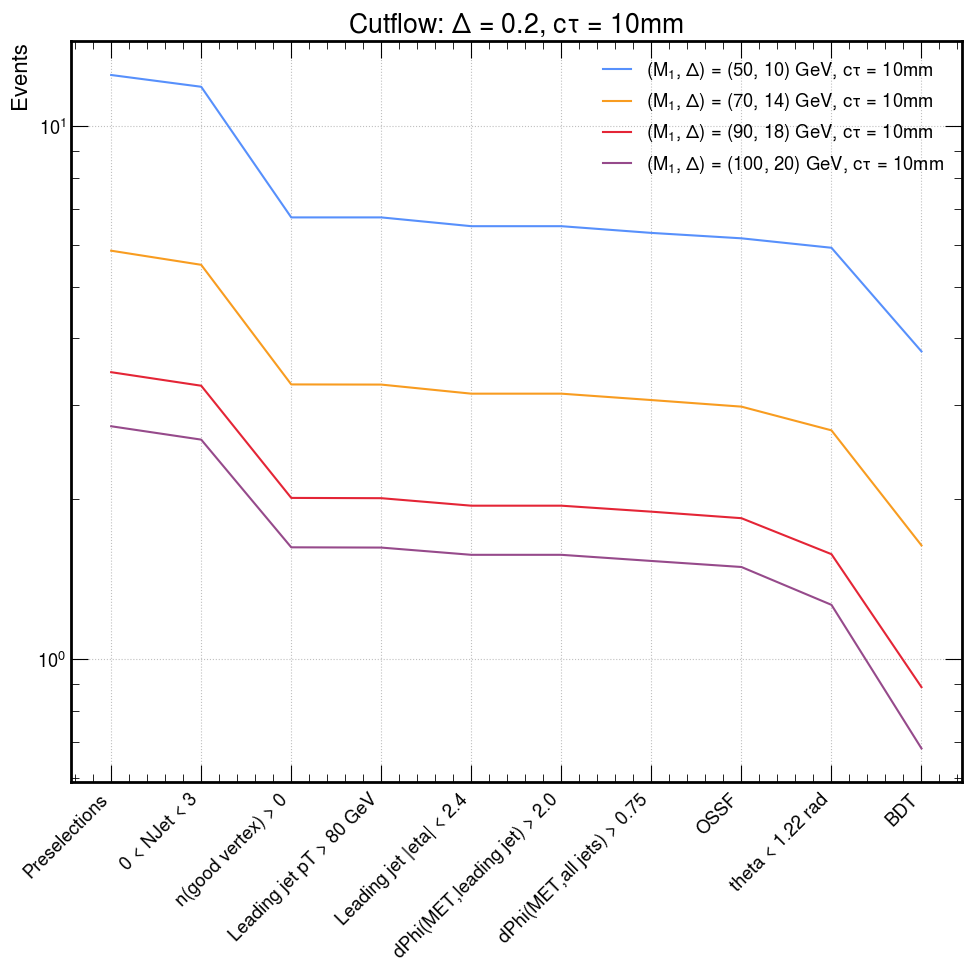

['Preselections', '0 < NJet < 3', 'n(good vertex) > 0', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 1.22 rad', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m50to100.png


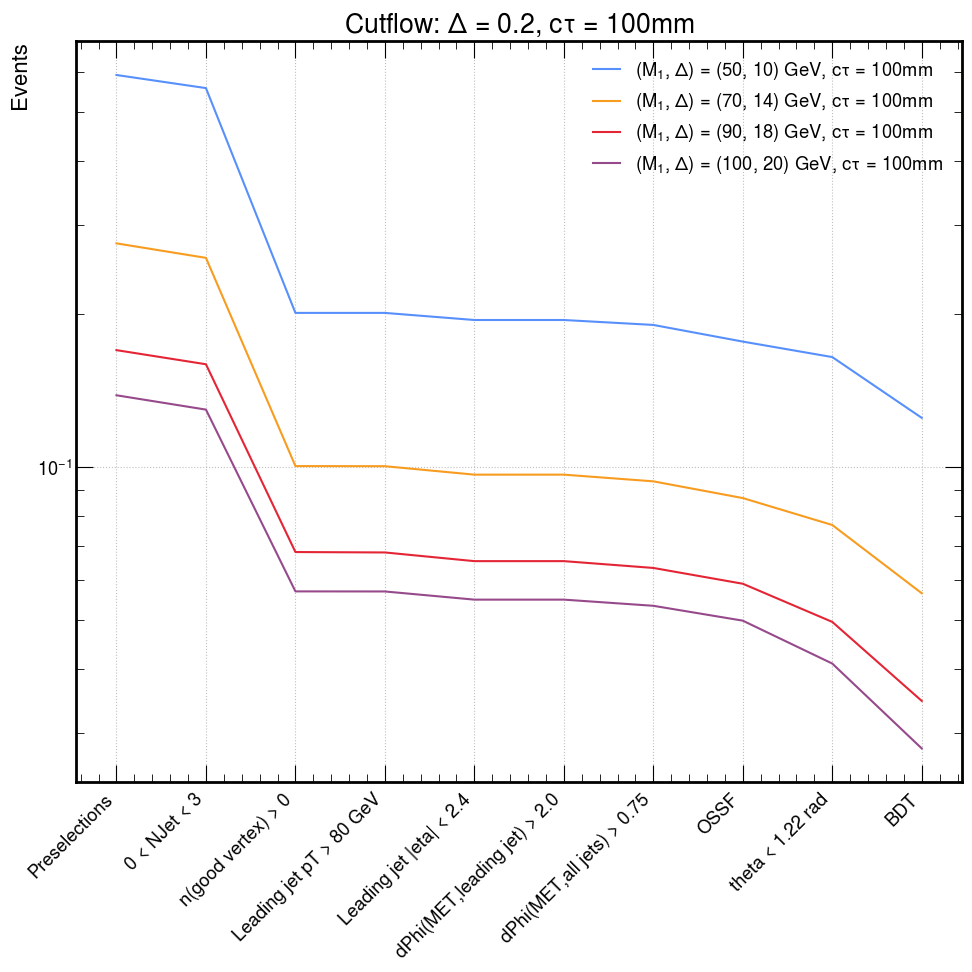

In [25]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Signal purity

In [26]:
purity_v11 = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched')

In [27]:
purity_v11_reco = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_fromReco')

In [28]:
purity_v10 = utils.get_signal_cutflow_dict(sig_histo2, 'cutflow_vtx_matched')

NameError: name 'sig_histo2' is not defined

In [ ]:
purity_v10_reco = utils.get_signal_cutflow_dict(sig_histo2, 'cutflow_vtx_matched_fromReco')

In [24]:
ct = 10
delta = 0.2

In [25]:
table = purity_v11

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v11_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v11_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [26]:
table = purity_v10

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v10_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v10_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

Text(0.5, 1.0, '$\\Delta$=0.2, 10mm')

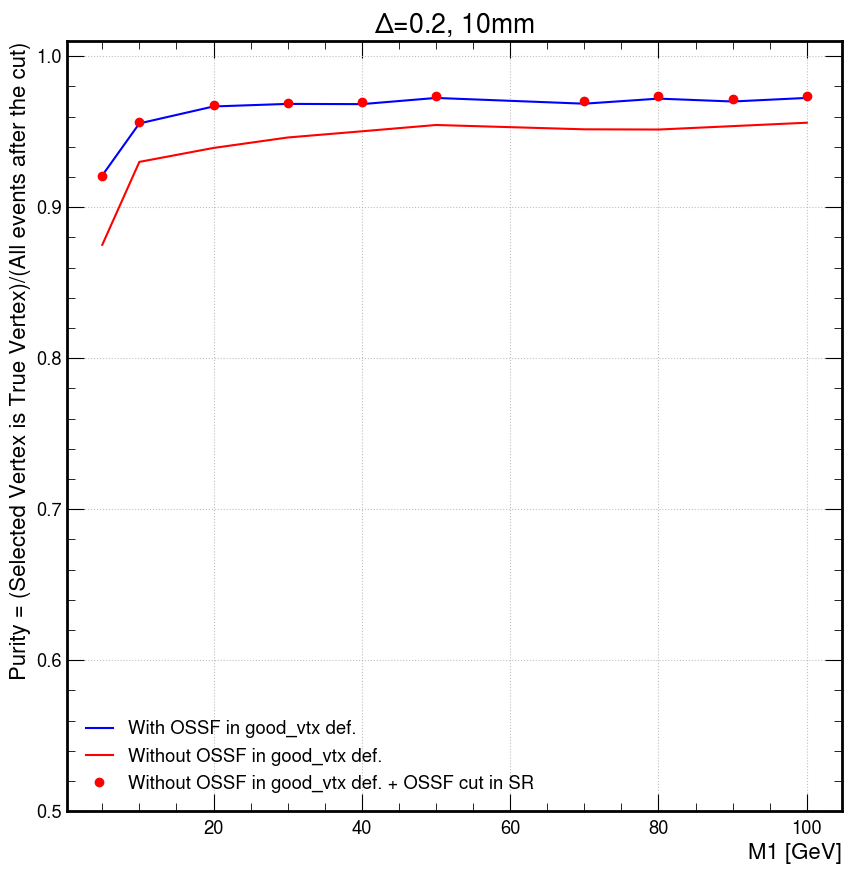

In [27]:
plt.plot(m_list, purity_v10_beforeOSSF, '-', color='blue', label='With OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_beforeOSSF, '-', color='red', label='Without OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_afterOSSF, 'o', color='red', label='Without OSSF in good_vtx def. + OSSF cut in SR')


plt.grid()
plt.ylim([0.5,1.01])

plt.xlabel('M1 [GeV]')
plt.ylabel('Purity = (Selected Vertex is True Vertex)/(All events after the cut)')

plt.legend()

plt.title(rf"$\Delta$={delta}, {ct}mm")

In [28]:
table = purity_v11_reco

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v11_reco_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v11_reco_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [29]:
table = purity_v10_reco

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v10_reco_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v10_reco_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

Text(0.5, 1.0, '$\\Delta$=0.2, 10mm')

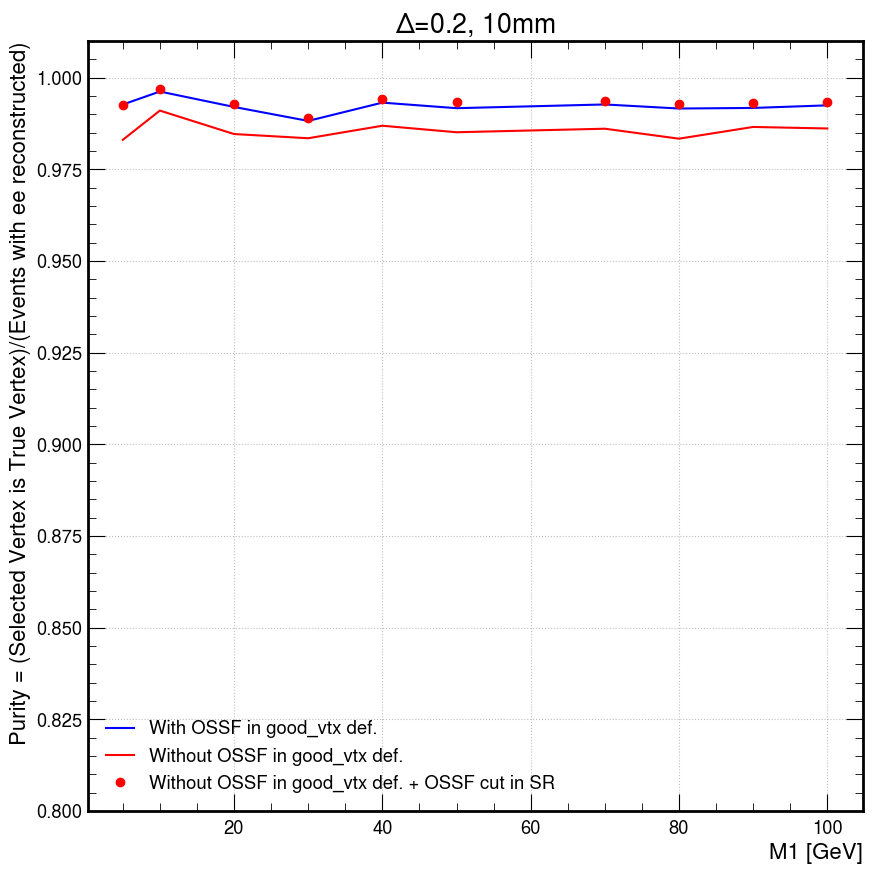

In [30]:
plt.plot(m_list, purity_v10_reco_beforeOSSF, '-', color='blue', label='With OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_reco_beforeOSSF, '-', color='red', label='Without OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_reco_afterOSSF, 'o', color='red', label='Without OSSF in good_vtx def. + OSSF cut in SR')

plt.grid()
plt.ylim([0.8,1.01])

plt.xlabel('M1 [GeV]')
plt.ylabel('Purity = (Selected Vertex is True Vertex)/(Events with ee reconstructed)')

plt.legend()

plt.title(rf"$\Delta$={delta}, {ct}mm")

## Background

In [29]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,0 < NJet < 3,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 1.22 rad,BDT
Top,0.00039885,0.00008379,0.00001350,0.00001256,0.00001134,0.00001120,0.00001015,0.00000648,0.00000303,0.00000001
Multiboson,0.00065832,0.00029886,0.00003655,0.00003152,0.00002904,0.00002809,0.00002601,0.00001838,0.00000744,0.00000000
QCD,0.00000249,0.00000043,0.00000001,0.00000001,0.00000001,0.00000001,0.00000000,0.00000000,0.00000000,0.00000000
DY,0.00018701,0.00008154,0.00001197,0.00001186,0.00001140,0.00001127,0.00000966,0.00000768,0.00000371,0.00000001
ZGamma,0.00032468,0.00018093,0.00001724,0.00001466,0.00001380,0.00001362,0.00001346,0.00000906,0.00000500,0.00000000
ZJets,0.00242159,0.00129929,0.00007781,0.00007703,0.00007297,0.00007272,0.00006795,0.00003589,0.00001642,0.00000008
WJets,0.00101318,0.00051367,0.00003887,0.00003823,0.00003632,0.00003609,0.00003287,0.00001724,0.00000792,0.00000003
Total,0.00001696,0.00000748,0.00000056,0.00000055,0.00000051,0.00000051,0.00000046,0.00000025,0.00000011,0.00000000


In [30]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/ABCD_SR_goodvtx_v11_0p98/Cutflow/Efficiency//Background_Efficiency.csv


In [31]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,0 < NJet < 3,n(jet) > 2 && n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 1.22 rad,BDT
Top,"26,174.93","5,499.10",886.11,824.36,743.91,734.85,666.36,425.30,198.61,0.87
Multiboson,"4,588.16","2,082.94",254.75,219.66,202.41,195.78,181.28,128.10,51.85,0.00
QCD,"53,432.27","9,247.44",292.71,292.71,232.09,218.73,33.13,16.28,0.23,0.00
DY,"5,819.49","2,537.50",372.48,369.17,354.65,350.82,300.53,239.01,115.60,0.20
ZGamma,"1,665.13",927.89,88.40,75.17,70.78,69.84,69.06,46.48,25.66,0.00
ZJets,"63,745.58","34,202.30","2,048.15","2,027.78","1,920.79","1,914.16","1,788.69",944.76,432.20,1.99
WJets,"214,692.24","108,847.10","8,236.63","8,101.06","7,695.67","7,646.59","6,965.74","3,654.00","1,678.36",5.70
Total,"370,117.80","163,344.28","12,179.23","11,909.91","11,220.31","11,130.78","10,004.80","5,453.95","2,502.51",8.75


In [32]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/ABCD_SR_goodvtx_v11_0p98/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [33]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,0 < NJet < 3,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 1.22 rad,BDT
Top,703976,133860,22872,20985,18878,18452,16644,10743,4999,16
Multiboson,25187,9897,1385,1156,1075,1009,934,664,264,0
QCD,31490,3254,96,96,94,91,7,3,1,0
DY,296131,49567,7379,7346,7226,6856,4617,3766,1820,2
ZGamma,6506,3331,355,318,303,289,258,162,78,0
ZJets,738994,246156,12869,12749,12253,12096,10365,5450,2494,11
WJets,1177020,325488,22068,21780,20970,20564,17340,9058,4201,15
Total,2979304,771553,67024,64430,60799,59357,50165,29846,13857,44


In [34]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,0 < NJet < 3,n(jet) > 2 && n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 1.22 rad,BDT
Top,703976,133860,22872,20985,18878,18452,16644,10743,4999,16
Multiboson,25187,9897,1385,1156,1075,1009,934,664,264,0
QCD,31490,3254,96,96,94,91,7,3,1,0
DY,296131,49567,7379,7346,7226,6856,4617,3766,1820,2
ZGamma,6506,3331,355,318,303,289,258,162,78,0
ZJets,738994,246156,12869,12749,12253,12096,10365,5450,2494,11
WJets,1177020,325488,22068,21780,20970,20564,17340,9058,4201,15
Total,2979304,771553,67024,64430,60799,59357,50165,29846,13857,44


In [35]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/ABCD_SR_goodvtx_v11_0p98/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [36]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 8.75


In [37]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,Top,Multiboson,QCD,DY,ZGamma,ZJets,WJets,Total
Weighted Counts,0.87,0.00,0.00,0.20,0.00,1.99,5.70,8.75
Raw Counts,16.00,0.00,0.00,2.00,0.00,11.00,15.00,44.00


In [38]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-3]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-3]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,Top,Multiboson,QCD,DY,ZGamma,ZJets,WJets,Total
Weighted Counts,425.30,128.10,16.28,239.01,46.48,944.76,"3,654.00","5,453.95"
Raw Counts,"10,743.00",664.00,3.00,"3,766.00",162.00,"5,450.00","9,058.00","29,846.00"


KeyError: 'DY'

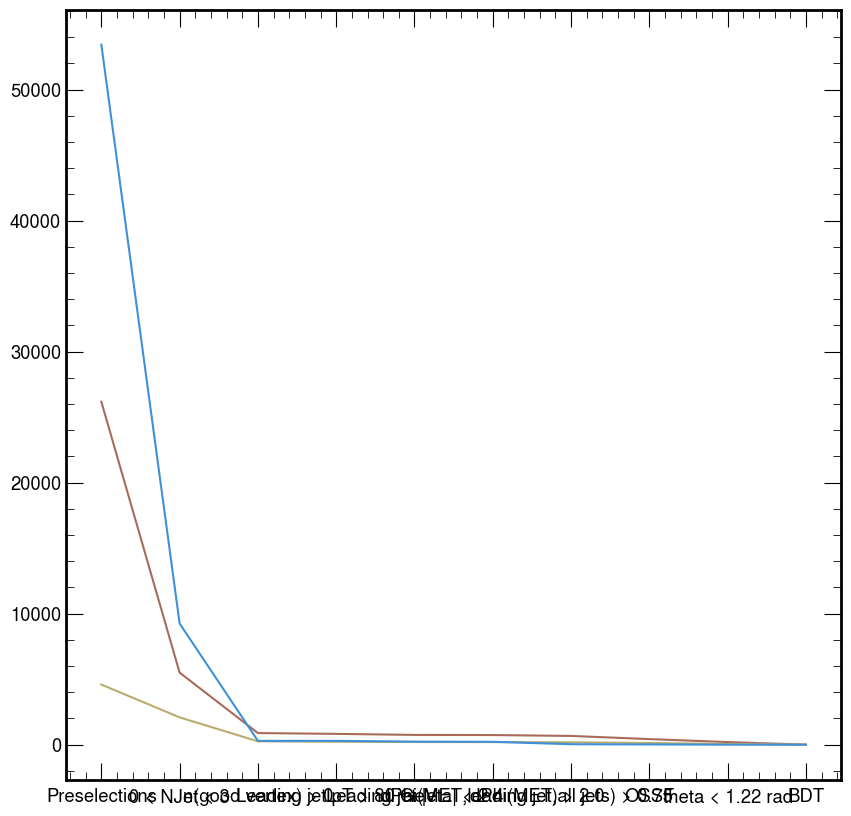

In [39]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

KeyError: 'DY'

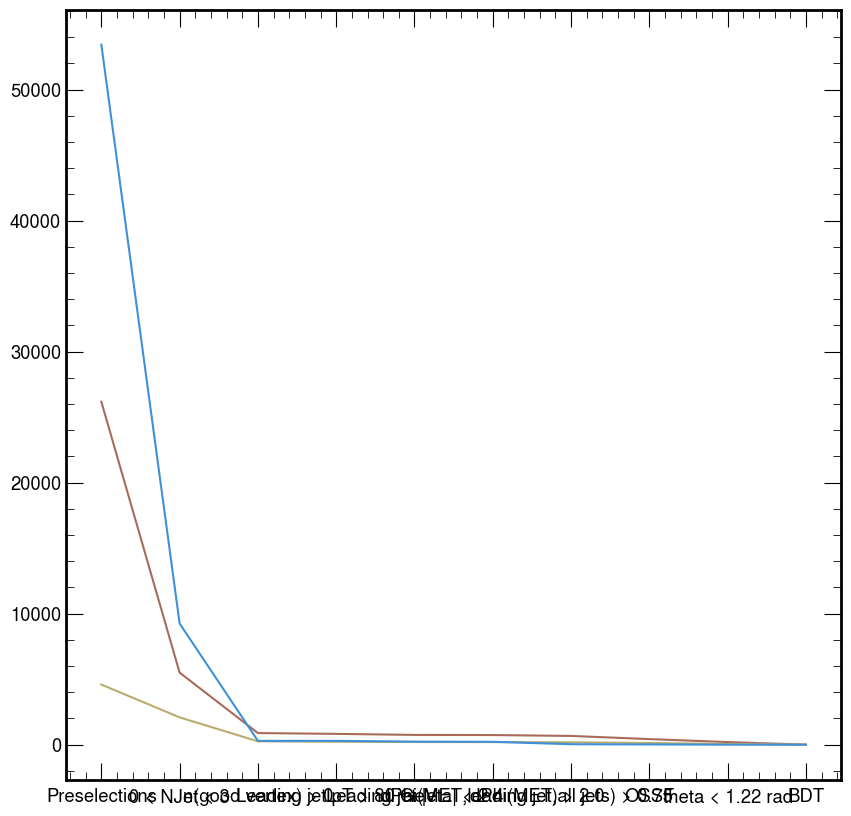

In [40]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

## S/B

In [41]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

8.749193950612948

In [42]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [43]:
pd.options.display.float_format = '{:,.4f}'.format


In [44]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

,BDT,m1,delta,ctau
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,168.6683,5.0000,0.1000,10.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"1,661.8314",5.0000,0.1000,1.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,3.1629,5.0000,0.1000,100.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,156.4219,5.0000,0.2000,1.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,14.6142,5.0000,0.2000,10.0000
...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,0.6809,100.0000,0.2000,10.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,79.3330,100.0000,0.1000,1.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,19.2136,100.0000,0.1000,10.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,0.0280,100.0000,0.2000,100.0000


In [45]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [46]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0000,0.1000,10.0000,168.6683,8.7492,57.0229
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0000,0.1000,1.0000,"1,661.8314",8.7492,561.8274
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0000,0.1000,100.0000,3.1629,8.7492,1.0693
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0000,0.2000,1.0000,156.4219,8.7492,52.8827
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0000,0.2000,10.0000,14.6142,8.7492,4.9407
...,...,...,...,...,...,...
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,100.0000,0.1000,1.0000,79.3330,8.7492,26.8207
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,100.0000,0.1000,10.0000,19.2136,8.7492,6.4957
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,100.0000,0.2000,100.0000,0.0280,8.7492,0.0095
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,100.0000,0.1000,100.0000,0.7636,8.7492,0.2582


In [47]:
outdir = './csv/SR_Yields/'
outname = f'SR_S_over_B'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//SR_S_over_B.csv


In [48]:
ct = 1.0


In [49]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0,0.1,1.0,"1,661.8314",8.7492,561.8274
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.0,0.1,1.0,"1,875.4324",8.7492,634.0411
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,20.0,0.1,1.0,"1,779.5210",8.7492,601.6156
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,30.0,0.1,1.0,"2,057.3083",8.7492,695.5292
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1,40.0,0.1,1.0,"1,097.5294",8.7492,371.0497
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,50.0,0.1,1.0,453.4090,8.7492,153.2873
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,60.0,0.1,1.0,283.3007,8.7492,95.7775
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,70.0,0.1,1.0,196.5970,8.7492,66.4650
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,80.0,0.1,1.0,136.0692,8.7492,46.0019
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,90.0,0.1,1.0,110.5973,8.7492,37.3904


In [50]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0,0.2,1.0,156.4219,8.7492,52.8827
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,10.0,0.2,1.0,115.8922,8.7492,39.1805
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,20.0,0.2,1.0,94.0962,8.7492,31.8118
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1,30.0,0.2,1.0,"5,355.6771",8.7492,"1,810.6327"
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,40.0,0.2,1.0,55.2958,8.7492,18.6943
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,50.0,0.2,1.0,20.1486,8.7492,6.8118
62,60.0,0.2,1.0,0.0000,8.7492,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,70.0,0.2,1.0,8.3653,8.7492,2.8281
65,80.0,0.2,1.0,0.0000,8.7492,0.0000
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,90.0,0.2,1.0,4.1561,8.7492,1.4051


In [51]:
ct = 10.0


In [52]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0,0.1,10.0,168.6683,8.7492,57.0229
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.0,0.1,10.0,268.0113,8.7492,90.6085
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,20.0,0.1,10.0,345.2228,8.7492,116.7120
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,30.0,0.1,10.0,"3,689.9603",8.7492,"1,247.4917"
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,40.0,0.1,10.0,241.5979,8.7492,81.6788
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,50.0,0.1,10.0,95.1999,8.7492,32.1849
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,60.0,0.1,10.0,60.4814,8.7492,20.4474
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,70.0,0.1,10.0,45.1714,8.7492,15.2714
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,80.0,0.1,10.0,32.1450,8.7492,10.8675
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,90.0,0.1,10.0,24.8933,8.7492,8.4159


In [53]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0,0.2,10.0,14.6142,8.7492,4.9407
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,10.0,0.2,10.0,13.4160,8.7492,4.5356
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,20.0,0.2,10.0,15.1750,8.7492,5.1303
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10,30.0,0.2,10.0,"2,854.9277",8.7492,965.1862
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10,40.0,0.2,10.0,9.4574,8.7492,3.1973
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,50.0,0.2,10.0,3.7822,8.7492,1.2787
63,60.0,0.2,10.0,0.0000,8.7492,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,70.0,0.2,10.0,1.6364,8.7492,0.5532
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,80.0,0.2,10.0,1.1627,8.7492,0.3931
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,90.0,0.2,10.0,0.8873,8.7492,0.3000


In [54]:
ct = 100.0


In [55]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0,0.1,100.0,3.1629,8.7492,1.0693
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,10.0,0.1,100.0,5.5810,8.7492,1.8868
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,20.0,0.1,100.0,9.3342,8.7492,3.1557
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,30.0,0.1,100.0,"1,376.8323",8.7492,465.4757
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,40.0,0.1,100.0,7.1503,8.7492,2.4173
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,50.0,0.1,100.0,3.2574,8.7492,1.1013
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,60.0,0.1,100.0,2.2078,8.7492,0.7464
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,70.0,0.1,100.0,1.5498,8.7492,0.5239
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,80.0,0.1,100.0,1.2087,8.7492,0.4086
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,90.0,0.1,100.0,0.9582,8.7492,0.3239


In [56]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0,0.2,100.0,0.1870,8.7492,0.0632
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,10.0,0.2,100.0,0.2872,8.7492,0.0971
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100,20.0,0.2,100.0,0.3969,8.7492,0.1342
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100,30.0,0.2,100.0,96.0322,8.7492,32.4663
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,40.0,0.2,100.0,0.2927,8.7492,0.0989
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,50.0,0.2,100.0,0.1250,8.7492,0.0423
64,60.0,0.2,100.0,0.0000,8.7492,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,70.0,0.2,100.0,0.0565,8.7492,0.0191
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,80.0,0.2,100.0,0.0483,8.7492,0.0163
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,90.0,0.2,100.0,0.0347,8.7492,0.0117
